# NovelD

In [20]:
from model.modules.lnoveld import NovelD

m = NovelD(10, 5, 100)

In [22]:
import matplotlib.pyplot as plt
import torch
from tqdm import tqdm

def train(model, batch_size, n_epochs):
    rewards = []
    losses = []
    for n_e in tqdm(range(n_epochs)):
        # Make predictions
        ep_rewards = []
        for b_i in range(batch_size):
            ep_rewards.append(model.get_reward(torch.rand(1, 17)))
        rewards.append(sum(ep_rewards))
        # Train
        losses.append(model.train_predictor())
    # Plot
    plt.plot(rewards)
    plt.plot(losses)

100%|███████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 60.03it/s]


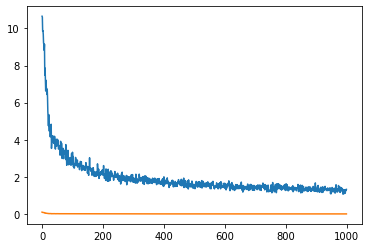

In [17]:
train(m, 32, 1000)

100%|██████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 721.98it/s]


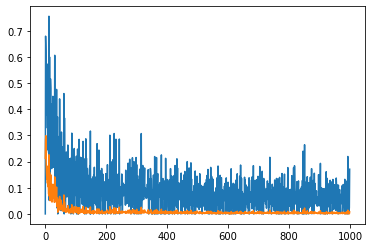

In [19]:
train(m, 1, 1000)

100%|███████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:48<00:00, 20.76it/s]


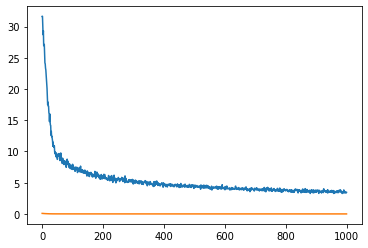

In [21]:
train(m, 100, 1000)

100%|███████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:46<00:00, 21.67it/s]


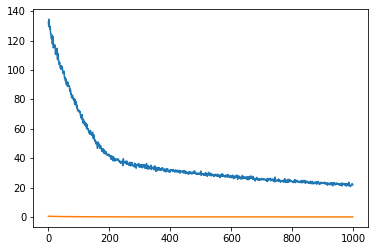

In [23]:
m = NovelD(17, 16, 64)
train(m, 100, 1000)

In [29]:
l = [np.random.rand(10), np.random.rand(10)]
l

[array([0.01332637, 0.86966362, 0.07826922, 0.75580822, 0.09602238,
        0.96651182, 0.04280373, 0.87886587, 0.90380471, 0.11783745]),
 array([0.33701291, 0.17958698, 0.37837657, 0.34447146, 0.28907411,
        0.57755394, 0.08705263, 0.64709855, 0.78802943, 0.27467977])]

In [30]:
np.concatenate(l)

array([0.01332637, 0.86966362, 0.07826922, 0.75580822, 0.09602238,
       0.96651182, 0.04280373, 0.87886587, 0.90380471, 0.11783745,
       0.33701291, 0.17958698, 0.37837657, 0.34447146, 0.28907411,
       0.57755394, 0.08705263, 0.64709855, 0.78802943, 0.27467977])

In [31]:
[1] * 2

[1, 1]

In [13]:
torch.seed()

4821780038691726644

In [36]:
torch.nn.Sequential(None, torch.nn.Linear(10, 10))

Sequential(
  (0): None
  (1): Linear(in_features=10, out_features=10, bias=True)
)

# LNovelD

In [1]:
from model.modules.lnoveld import LNovelD
from model.modules.lm import OneHotEncoder, GRUEncoder

m = LNovelD(17, 16, 12)
word_encoder = OneHotEncoder(vocab = ['Located', 'Object', 'Landmark', 'North', 'South', 'East', 'West', 'Center', 'Not'])
sentence_encoder = GRUEncoder(16, word_encoder)

In [1]:
import json

def load_pairs(data_path):
    with open(data_path, "r") as f:
        data = json.load(f)
    pairs = []
    for step, s_data in data.items():
        if not step.startswith("Step"):
            continue
        pairs.append({
            "observation": s_data["Agent_0"]["Observation"],
            "sentence": s_data["Agent_0"]["Sentence"][1:-1]
        })
        pairs.append({
            "observation": s_data["Agent_1"]["Observation"],
            "sentence": s_data["Agent_1"]["Sentence"][1:-1]
        })
    return pairs

data_pairs = load_pairs("test_data/Sentences_Generated_P1.json")
data_pairs[0]

{'observation': [0.3566717617981794,
  0.22018956073987805,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  1.0,
  -0.4988445287954038,
  -0.25249793046375035],
 'sentence': ['Located', 'East', 'Landmark', 'South', 'West']}

In [15]:
import matplotlib.pyplot as plt
import random
import torch
from tqdm import tqdm

def train(data, model, encoder, batch_size, n_epochs):
    rewards = []
    losses = []
    for n_e in tqdm(range(n_epochs)):
        # Make predictions
        ep_rewards = []
        for b_i in range(batch_size):
            d = random.sample(data, 1)[0]
            obs = torch.Tensor([d["observation"]])
            enc = encoder([d["sentence"]]).view(1, -1)
            ep_rewards.append(model.get_reward(obs, enc))
        rewards.append(sum(ep_rewards))
        # Train
        losses.append(model.train())
    # Plot
    plt.plot(rewards)
    plt.plot(losses)

100%|██████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 39.26it/s]


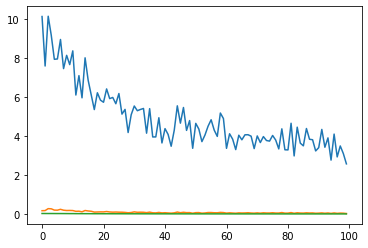

In [16]:
train(data_pairs, m, sentence_encoder, 10, 100)

In [22]:
from model.modules.lnoveld import LNovelD, NovelD
from model.modules.lm import OneHotEncoder, GRUEncoder
from model.modules.networks import MLPNetwork
from torch import nn
import torch

word_encoder = OneHotEncoder(vocab = ['Located', 'Object', 'Landmark', 'North', 'South', 'East', 'West', 'Center', 'Not'])
t = nn.Sequential(
    GRUEncoder(16, word_encoder),
    MLPNetwork(16, 10, 32, norm_in=False)
)


In [27]:
word_encoder = OneHotEncoder(vocab = ['Located', 'Object', 'Landmark', 'North', 'South', 'East', 'West', 'Center', 'Not'])
t = nn.Sequential(
    nn.GRU(word_encoder.enc_dim, 16, batch_first=True),
    MLPNetwork(16, 10, 32, norm_in=False)
)

In [17]:
import random
batch = random.sample(data_pairs, 2)
s = [d["sentence"] for d in batch]
o = [d["observation"] for d in batch]
o

[[-0.3724604600081203,
  0.7194394219180008,
  -0.35969995892634593,
  0.26121551758096706,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0],
 [-0.34018936050065746,
  -0.7854214518261261,
  1.0670280790578,
  0.24633443047118253,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.5007709800496712,
  -0.16144637043468468,
  0.00017908967753728735,
  0.0,
  0.0,
  1.0,
  1.0]]

In [29]:
out = t(word_encoder.encode_batch(s))
out

AttributeError: 'list' object has no attribute 'size'

In [14]:
out.shape

torch.Size([1, 2, 10])

In [19]:
n = NovelD(17, 10, 32)

In [23]:
n.target(torch.Tensor(o))

tensor([[-0.7601,  0.3964,  0.5406, -0.5273, -0.4874,  0.1589, -0.4641, -0.1543,
         -0.2597, -1.0139],
        [-0.3104, -0.0186, -0.2688, -0.7823, -0.2794,  0.2369, -0.3407, -0.0753,
         -0.2215, -0.5418]])

In [26]:
out.squeeze()

tensor([[-0.3718, -0.0514,  0.0791, -0.3347,  0.1883, -0.0781,  0.3447, -0.0570,
         -0.0815,  0.1373],
        [-0.2675, -0.0351,  0.0663, -0.3087,  0.1399, -0.0895,  0.2980, -0.0759,
         -0.0672,  0.1451]], grad_fn=<SqueezeBackward0>)

# MALNovelD

In [4]:
from model.malnoveld import MALNovelD

m = MALNovelD(17, 5, 16, 2, 
              ['Located', 'Object', 'Landmark', 'I', 'You', 'North', 'South', 'East', 'West', 'Center', 'Not', 'Push', 'Search'],
             0.0007)

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [7]:
pol = count_parameters(m.policy.agents[0].policy)
print("pol", pol)
crit = count_parameters(m.policy.agents[0].critic)
print("crit", crit)
print("agent", pol + crit)

pol 5671
crit 7193
crit 7193
agent 12864


In [9]:
obs_enc = count_parameters(m.obs_encoder)
print("obs_enc", obs_enc)
sent_enc = count_parameters(m.sentence_encoder)
print("sent_enc", sent_enc)
dec = count_parameters(m.decoder)
print("dec", dec)
dec = count_parameters(m.decoder)
print("dec", dec)

obs_enc 6386
sent_enc 1856
dec 1839
dec 1839


# Hyperparameters

## Test the influence of small changes in model input on model output, depending on model hyperparameters

To study this, let's look at distances between outputs of a neural networks with marginally different inputs.

In [1]:
import numpy as np

def dist(a, b):
    return np.linalg.norm(a-b)

In [26]:

import torch

from model.modules.networks import MLPNetwork

# Model hyperparameters
nb_hidden_layers = 1
hidden_dim = 64
activation_fn = 'relu'

# Model
m = MLPNetwork(20, 10, hidden_dim, nb_hidden_layers, activation_fn, norm_in=False)

# Model inputs
i1 = torch.rand(20).unsqueeze(0)
i2 = torch.clone(i1)
i2[0, 5] = 1
print(dist(i1, i2))

with torch.no_grad():
    
    print(dist(m(i1), m(i2)))

0.55722314
0.22780274


### Hidden dim

0.71947086


100%|█████████████████████████████████████████████| 7/7 [01:43<00:00, 14.75s/it]


<AxesSubplot:xlabel='Hidden dim', ylabel='Distance'>

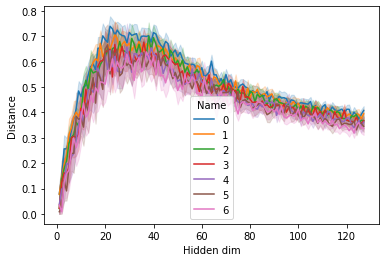

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm import trange

# Model inputs
i1 = torch.rand(40).unsqueeze(0)
i2 = torch.clone(i1)
i2[0, 5] = 1
print(dist(i1, i2))

dists = []
with torch.no_grad():
    for nb_hidden_layers in trange(7):
        for hidden_dim in range(1, 128):
            for i in range(50):
                # Model
                m = MLPNetwork(40, 20, hidden_dim, nb_hidden_layers, 'relu', norm_in=False)

                dists.append({
                    "Name": str(nb_hidden_layers), 
                    "Hidden dim": hidden_dim, 
                    "Distance": dist(m(i1), m(i2))})

dists_df = pd.DataFrame.from_dict(dists)

sns.lineplot(data=dists_df, x="Hidden dim", y="Distance", hue="Name")

### Number of hidden layers

100%|███████████████████████████████████████████| 10/10 [00:14<00:00,  1.44s/it]


<AxesSubplot:xlabel='nb_hidden', ylabel='Distance'>

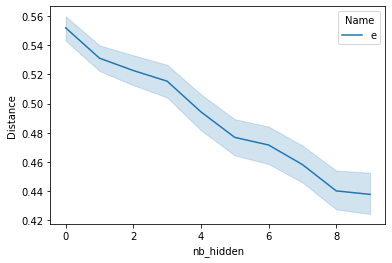

In [52]:
dists = []
with torch.no_grad():
    for nb_hidden_layers in trange(0, 10):
        for i in range(500):
            # Model
            m = MLPNetwork(40, 20, 64, nb_hidden_layers, 'relu', norm_in=False)
            
            dists.append({"Name": "e", "nb_hidden": nb_hidden_layers, "Distance": dist(m(i1), m(i2))})

dists_df = pd.DataFrame.from_dict(dists)

sns.lineplot(data=dists_df, x="nb_hidden", y="Distance", hue="Name")

### Size of embedding

In [45]:
from tqdm import tqdm

100%|█████████████████████████████████████████████| 8/8 [01:06<00:00,  8.33s/it]


<AxesSubplot:xlabel='embed_dim', ylabel='Distance'>

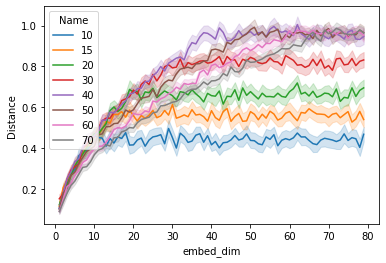

In [56]:
dists = []
with torch.no_grad():
    for hidden_dim in tqdm([10, 15, 20, 30, 40, 50, 60, 70]):
        for embed_dim in range(1, 80):
            for i in range(100):
                # Model
                m = MLPNetwork(40, embed_dim, hidden_dim, 1, 'relu', norm_in=False)

                dists.append({
                    "Name": str(hidden_dim), 
                    "embed_dim": embed_dim, 
                    "Distance": dist(m(i1), m(i2))})

dists_df = pd.DataFrame.from_dict(dists)

sns.lineplot(data=dists_df, x="embed_dim", y="Distance", hue="Name")